In [121]:
# python -m pip install SoundFile
import glob
import os
from info import i, printb, printr, printp, print
import glob
import os
import librosa
import pdb
import csv
import json
import re
import numpy as np
import random
import librosa.display
import IPython.display as ipd
from sklearn import preprocessing
from collections import Counter
from matplotlib import pyplot as plt
from info import i, printb, printr, printp
import muda
import jams
from sklearn import svm
import librosa
import keras
import scipy.io as sio
import io
import pandas as pd
#-----------------------------------parameters for CNN -----------------------------------#
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
#from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from keras.models import Sequential, Input, Model 
from keras.layers import Dense, Dropout, Flatten, Activation 
from keras.layers import Conv2D , MaxPooling2D
from keras.layers.normalization import BatchNormalization 
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.models import Sequential, load_model
#-----------------------------------parameters for TTBOX -----------------------------------#
import timbre_descriptor as td
import numpy as np
import scipy as sc
import my_tools as mt
from collections import namedtuple
import scipy
import scipy.signal
from scipy.io import wavfile

import matplotlib
import swipep as swp             # used for sing le-F0 estimation
import warnings                 # used for warning removal
import time               # used performance benchmark
import librosa


from utils import split_samples_byHive,get_list_samples_name_benetos,  write_sample_ids_perHive, get_list_samples_name_TTBOX, get_samples_id_perSet,  split_samples_ramdom, get_list_sample_ids, get_list_samples_name_STFT, get_features_from_samples_withAUGMENTATION,  raw_feature_fromSample_withAUGMENTATION , get_list_samples_names, get_features_from_samples, write_Statelabels_from_beeNotBeelabels,raw_feature_fromSample, labels2binary , get_GT_labels_fromFiles, get_items2replicate, BalanceData_online, get_list_samples_name_MFCC, SVM_Classification_BeehiveSTATE , fit_and_evaluate,deep_model, plot_confusion_matrix, get_list_samples_name_TTBOX, Dense_Net, plot_accuracy_val_accuracy, train_and_evaluate_model,save_confusion_matrix , read_HiveState_fromSampleName

In [122]:
#----------------------------------- parameters to change-----------------------------------#
block_size=1 # blocks of 1 second
thresholds=[0, 0.5]  # minimum length for nobee intervals: 0 or 5 seconds (creates one label file per threshold value)
path= "C:\\Users\PC\python\Stage"
path_audioFiles= path +"\To Bee or not to Bee_the annotated dataset"+os.sep  # path to audio files
annotations_path=path + "To Bee or not to Bee_the annotated dataset"+os.sep # path to .lab files
path_save_audio_labels= path+ '\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+os.sep  # path where to save audio segments and labels files.
#----------------------------------- parameters to change-----------------------------------#
path_workingFolder= path+ '\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+os.sep  # path where to save audio segments and labels files.
labels2read= 'state_labels'
feature = 'MFCCs20'
path1= 'C:\\Users\PC\python\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'
path_working_MFCCs20= path1+'\\MFCCs20_matrix.mat'+os.sep
path_working_TTBox= path1+'\\TTBox_matrix.mat'+os.sep
path_save_audio_MFCCs= path1+'\\MFCCs20_matrix.mat'+os.sep 
path_working_stft= path1+'\\stft_matrix.mat'+os.sep

nbits = 16;
MAX_VAL = pow(2,(nbits-1)) * 1.0;
class_names= ['missing queen', 'active' ]
#----------------------------------parameter for CNN -----------------------------------------------------------#
# Set early stopping critiria
pat=5 # this is the number of epocks with no improvment after which the training will stop 
early_stopping= EarlyStopping(monitor='val_loss', patience=pat, verbose=1 )
n_folds=2
epochs=50
batch_size=145
history_MFCCs= []
history_TTBOX= []
#----------------------------------------------------------------------------------------------#
# if path doesn't exist then create one !!!
if not os.path.exists(path_save_audio_labels):
    os.makedirs(path_save_audio_labels)  

In [123]:
###load_audioFiles_saves_segments( path_audioFiles, path_save_audio_labels, block_size , thresholds, annotations_path, read_beeNotBee_annotations='yes', save_audioSegments='yes')  
# read only labels_BeeNotBee_th0.5
path_beeNotbee_labels = path_save_audio_labels + 'labels_BeeNotBee_th'+str(thresholds[1])+'.csv'
print("path_beeNotbee_labels: ",path_beeNotbee_labels)  
sample_ids=get_list_samples_names(path_save_audio_labels) # get sample ids from audio segments folder.
print(len(sample_ids) ) 

[2020-07-20 16:17:26 RAM72.9% 0.6GB] path_beeNotbee_labels:  C:\Users\PC\python\Stage\dataset_BeeNoBee_2_second1sec\labels_BeeNotBee_th0.5.csv
[2020-07-20 16:17:27 RAM72.9% 0.6GB] 17295


In [124]:
sample_ids_test, sample_ids_train, sample_ids_val = get_samples_id_perSet(path_workingFolder+'split_random_0.json') 
print(len(sample_ids_test), len(sample_ids_train), len(sample_ids_val))

[2020-07-20 16:17:27 RAM72.9% 0.6GB] 5188 6053 6054


# MFCC+ SVM_PCA:

In [125]:
x_test,y_test,labels_test, x_train,y_train,labels_train,  x_valid,y_valid,labels_valid, val_test, val_train, val_valid= get_list_samples_name_benetos( 'b', path_save_audio_MFCCs,sample_ids_test, sample_ids_val, sample_ids_train )


#x_train, x_valid, x_test, y_train, y_valid, y_test = get_list_sample_ids(path_save_audio_MFCCs, sample_ids_test, sample_ids_val, sample_ids_train)
print(len(x_train), len(x_valid), len(x_test) , len(y_train), len(y_valid), len(y_test))
print("Reshape the data")
x_train= np.array(x_train)
x_valid= np.array(x_valid)
x_test= np.array(x_test)
y_test=np.array(y_test)
y_train=np.array(y_train)
y_valid=np.array(y_valid)


X_train= np.concatenate((x_train, x_valid))
Y_train= np.concatenate((y_train, y_valid))
x, y, z= X_train.shape
X_train=X_train.reshape(x, y*z)
t, u, v= x_test.shape
x_test= x_test.reshape(t, u*v)

print(X_train.shape, x_test.shape, Y_train.shape, y_test.shape )


[2020-07-20 16:19:16 RAM72.5% 0.61GB] 6053 6054 5188 6053 6054 5188
[2020-07-20 16:19:16 RAM72.5% 0.61GB] Reshape the data
[2020-07-20 16:19:16 RAM73.9% 0.73GB] (12107, 880) (5188, 880) (12107,) (5188,)


In [126]:
from sklearn.decomposition import PCA
pca=PCA(0.9)
pca.fit(X_train)
pca.n_components_

2

In [127]:
x_train_pca= pca.transform(X_train)
x_test_pca= pca.transform(x_test)

In [128]:
CLF, Test_GroundT, Train_GroundT, Test_Preds, Train_Preds, Test_Preds_Proba, Train_Preds_Proba = SVM_Classification_BeehiveSTATE(x_train_pca, Y_train , x_test_pca, y_test, kerneloption='rbf')
# Metrics
print("Accuracy: ", metrics.accuracy_score( Test_GroundT, Test_Preds))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Test_GroundT, Test_Preds))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Test_GroundT, Test_Preds))




[2020-07-20 16:19:19 RAM74.1% 0.73GB] Starting classification with SVM:


[2020-07-20 16:19:19 RAM74.1% 0.73GB] classification Beehive State into : Active or Missing Queen
[2020-07-20 16:19:35 RAM74.3% 0.76GB] Accuracy:  0.8710485736314572
[2020-07-20 16:19:35 RAM74.3% 0.76GB] Precision: 0.8981481481481481
[2020-07-20 16:19:35 RAM74.3% 0.76GB] Recall: 0.8332682545880515


# MFCC+SVM_LDA:

In [129]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [130]:
x_test,y_test,labels_test, x_train,y_train,labels_train,  x_valid,y_valid,labels_valid, val_test, val_train, val_valid= get_list_samples_name_benetos( 'b', path_save_audio_MFCCs,sample_ids_test, sample_ids_val, sample_ids_train )


#x_train, x_valid, x_test, y_train, y_valid, y_test = get_list_sample_ids(path_save_audio_MFCCs, sample_ids_test, sample_ids_val, sample_ids_train)
print(len(x_train), len(x_valid), len(x_test) , len(y_train), len(y_valid), len(y_test))
print("Reshape the data")
x_train= np.array(x_train)
x_valid= np.array(x_valid)
x_test= np.array(x_test)
y_test=np.array(y_test)
y_train=np.array(y_train)
y_valid=np.array(y_valid)


X_train= np.concatenate((x_train, x_valid))
Y_train= np.concatenate((y_train, y_valid))
x, y, z= X_train.shape
X_train=X_train.reshape(x, y*z)
t, u, v= x_test.shape
x_test= x_test.reshape(t, u*v)

print(X_train.shape, x_test.shape, Y_train.shape, y_test.shape )


[2020-07-20 16:21:22 RAM73.7% 0.7GB] 6053 6054 5188 6053 6054 5188
[2020-07-20 16:21:22 RAM73.7% 0.7GB] Reshape the data
[2020-07-20 16:21:22 RAM74.5% 0.76GB] (12107, 880) (5188, 880) (12107,) (5188,)


# Feature Scaling: 

In [131]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(x_test)

In [132]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

In [133]:
CLF, Test_GroundT, Train_GroundT, Test_Preds, Train_Preds, Test_Preds_Proba, Train_Preds_Proba = SVM_Classification_BeehiveSTATE(X_train, Y_train , X_test, y_test, kerneloption='rbf')
# Metrics
print("Accuracy: ", metrics.accuracy_score( Test_GroundT, Test_Preds))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Test_GroundT, Test_Preds))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Test_GroundT, Test_Preds))




[2020-07-20 16:21:27 RAM74.5% 0.68GB] Starting classification with SVM:


[2020-07-20 16:21:27 RAM74.5% 0.68GB] classification Beehive State into : Active or Missing Queen
[2020-07-20 16:21:40 RAM73.7% 0.69GB] Accuracy:  0.89745566692367
[2020-07-20 16:21:40 RAM73.7% 0.69GB] Precision: 0.8879541108986616
[2020-07-20 16:21:40 RAM73.7% 0.69GB] Recall: 0.9066770792659118


In [134]:
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score

#cm = confusion_matrix(y_test, Test_Preds)

#print('Accuracy : ' + str(accuracy_score(y_test, Test_Preds)))
#cm

Confusion matrix, without normalization
[[2334  293]
 [ 239 2322]]


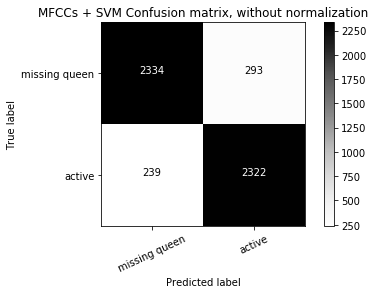

[2020-07-20 16:21:41 RAM73.7% 0.69GB] 
Clasification report MFCCs + SVM:
                precision    recall  f1-score   support

missing_queen       0.91      0.89      0.90      2627
       active       0.89      0.91      0.90      2561

     accuracy                           0.90      5188
    macro avg       0.90      0.90      0.90      5188
 weighted avg       0.90      0.90      0.90      5188



In [135]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Test_GroundT, Test_Preds )
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='MFCCs + SVM Confusion matrix, without normalization')
plt.show()
# Plot normalized confusion matrix

plt.show()
target_names=['missing_queen', 'active']
print ('\nClasification report MFCCs + SVM:\n', classification_report(Test_GroundT, Test_Preds , target_names=target_names))

# MFCC+SVM _MI:

In [178]:
x_test,y_test,labels_test, x_train,y_train,labels_train,  x_valid,y_valid,labels_valid, val_test, val_train, val_valid= get_list_samples_name_benetos( 'b', path_save_audio_MFCCs,sample_ids_test, sample_ids_val, sample_ids_train )


#x_train, x_valid, x_test, y_train, y_valid, y_test = get_list_sample_ids(path_save_audio_MFCCs, sample_ids_test, sample_ids_val, sample_ids_train)
print(len(x_train), len(x_valid), len(x_test) , len(y_train), len(y_valid), len(y_test))
print("Reshape the data")
x_train= np.array(x_train)
x_valid= np.array(x_valid)
x_test= np.array(x_test)
y_test=np.array(y_test)
y_train=np.array(y_train)
y_valid=np.array(y_valid)


X_train= np.concatenate((x_train, x_valid))
Y_train= np.concatenate((y_train, y_valid))
x, y, z= X_train.shape
X_train=X_train.reshape(x, y*z)
t, u, v= x_test.shape
x_test= x_test.reshape(t, u*v)

print(X_train.shape, x_test.shape, Y_train.shape, y_test.shape )

[2020-07-22 17:13:34 RAM70.0% 0.15GB] 6053 6054 5188 6053 6054 5188
[2020-07-22 17:13:34 RAM70.0% 0.15GB] Reshape the data
[2020-07-22 17:13:34 RAM71.4% 0.31GB] (12107, 880) (5188, 880) (12107,) (5188,)


In [180]:
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.feature_selection import mutual_info_regression


#mi = mutual_info_regression(X_train, Y_train)
#mi /= np.max(mi)

#plt.figure(figsize=(15, 5))
#for i in range(3):
 #   plt.subplot(1, 3, i + 1)
 #   plt.scatter(X[:, i], y, edgecolor='black', s=20)
 #plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
 #   if i == 0:
  #      plt.ylabel("$y$", fontsize=14)
   # plt.title("MI={:.2f}".format(mi[i]),
    #          fontsize=16)
#plt.show()

In [181]:
# evaluation of a model using 88 features chosen with mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
#Running the example fits the model on the 100 top selected features chosen using mutual information. 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=100)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, x_test)
# fit the model
CLF, Test_GroundT, Train_GroundT, Test_Preds, Train_Preds, Test_Preds_Proba, Train_Preds_Proba = SVM_Classification_BeehiveSTATE(X_train_fs, Y_train , X_test_fs, y_test, kerneloption='rbf')
# Metrics
print("Accuracy: ", metrics.accuracy_score( Test_GroundT, Test_Preds))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Test_GroundT, Test_Preds))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Test_GroundT, Test_Preds))


#model = LinearRegression()
#model.fit(X_train_fs, y_train)
# evaluate the model
#yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(Test_GroundT, Test_Preds)
print('MAE: %.3f' % mae)




[2020-07-22 18:42:32 RAM69.9% 1.67GB] Starting classification with SVM:


[2020-07-22 18:42:32 RAM69.9% 1.67GB] classification Beehive State into : Active or Missing Queen
[2020-07-22 18:47:12 RAM61.6% 0.87GB] Accuracy:  0.7742868157286045
[2020-07-22 18:47:12 RAM61.6% 0.87GB] Precision: 0.910271546635183
[2020-07-22 18:47:12 RAM61.6% 0.87GB] Recall: 0.60210855134713
[2020-07-22 18:47:12 RAM61.6% 0.87GB] MAE: 0.226


Confusion matrix, without normalization
[[2475  152]
 [1019 1542]]


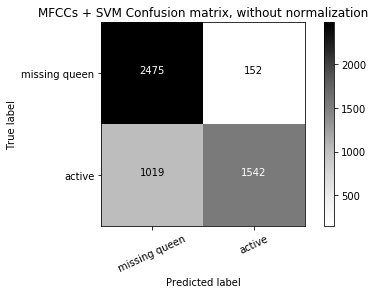

[2020-07-22 18:52:02 RAM60.4% 0.88GB] 
Clasification report MFCCs + SVM:
                precision    recall  f1-score   support

missing_queen       0.71      0.94      0.81      2627
       active       0.91      0.60      0.72      2561

     accuracy                           0.77      5188
    macro avg       0.81      0.77      0.77      5188
 weighted avg       0.81      0.77      0.77      5188



In [182]:

# Compute confusion matrix
cnf_matrix = confusion_matrix(Test_GroundT, Test_Preds )
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='MFCCs + SVM Confusion matrix, without normalization')
plt.show()
# Plot normalized confusion matrix

plt.show()
target_names=['missing_queen', 'active']
print ('\nClasification report MFCCs + SVM:\n', classification_report(Test_GroundT, Test_Preds , target_names=target_names))


# -----------------------------------------------------------------------------------

# MFCC+DNN_PCA:

In [136]:
x_test,y_test,labels_test, x_train,y_train,labels_train,  x_valid,y_valid,labels_valid, val_test, val_train, val_valid= get_list_samples_name_benetos( 'b', path_save_audio_MFCCs,sample_ids_test, sample_ids_val, sample_ids_train )

#x_train, x_valid, x_test, y_train, y_valid, y_test = get_list_sample_ids(path_save_audio_MFCCs, sample_ids_test, sample_ids_val, sample_ids_train)
print(len(x_train), len(x_valid), len(x_test) , len(y_train), len(y_valid), len(y_test))
x_train= np.array(x_train)
x_valid= np.array(x_valid)
x_test= np.array(x_test)
y_test=np.array(y_test)
y_train=np.array(y_train)
y_valid=np.array(y_valid)


X_train= np.concatenate((x_train, x_valid))
Y_train= np.concatenate((y_train, y_valid))

print(X_train.shape, x_test.shape, Y_train.shape, y_test.shape )


[2020-07-20 16:23:55 RAM71.8% 0.63GB] 6053 6054 5188 6053 6054 5188
[2020-07-20 16:23:55 RAM73.5% 0.77GB] (12107, 20, 44) (5188, 20, 44) (12107,) (5188,)


In [137]:
from sklearn.decomposition import PCA
from keras.utils import np_utils


X_train_flat=X_train.reshape(-1, 880)
x_test_flat= x_test.reshape(-1, 880)
print(X_train_flat.shape, x_test_flat.shape, Y_train.shape, y_test.shape )
print("calculate PCA ")
pca=PCA(0.9)
pca.fit(X_train_flat)
x_train_pca= pca.transform(X_train_flat)
x_test_pca= pca.transform(x_test_flat)
print(x_train_pca.shape, x_test_pca.shape)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape, y_test.shape)

[2020-07-20 16:23:56 RAM72.7% 0.66GB] (12107, 880) (5188, 880) (12107,) (5188,)
[2020-07-20 16:23:56 RAM72.7% 0.66GB] calculate PCA 
[2020-07-20 16:23:59 RAM72.4% 0.66GB] (12107, 2) (5188, 2)
[2020-07-20 16:23:59 RAM72.4% 0.66GB] (12107, 2) (5188, 2)


In [138]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.utils import np_utils
from keras.optimizers import RMSprop 


In [139]:
#model=deep_model(( 2 ,1))
#model.summary()
#model_history=[]
#val_accuracy=[]   
#model_filename = 'cnn_bee_PCA.h5'
#results, val_acc, report, confusion_matrix = train_and_evaluate_model(model, X_train, y_train, x_test, y_test,  Y_test ,epochs, batch_size, model_filename )
#model_history.append(results)
#val_accuracy.append(val_acc)
#df = pd.DataFrame(report).transpose()
#name="PCA classification report for MFCC + CNN.csv "
#filename="PCA confusion_matrix for MFCC + CNN "
#df.to_csv(name)
#save_confusion_matrix(confusion_matrix,filename, target_names )

In [140]:
batch_size=128
num_classes=2
epochs=20

model=Sequential()
model.add(Dense(1024, activation='relu', input_shape=(2, )))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1024)              3072      
_________________________________________________________________
dense_27 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_28 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_29 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 514       
Total params: 1,709,314
Trainable params: 1,709,314
Non-trainable params: 0
_________________________________________________________________


In [141]:
model.compile(loss='categorical_crossentropy', optimizer= RMSprop(), metrics=['accuracy'])
history_MFCCs.append(model.fit(x_train_pca, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test_pca, y_test) ))

Train on 12107 samples, validate on 5188 samples
Epoch 1/20
12107/12107 [==============================] - ETA: 16s - loss: 3.4230 - accuracy: 0.601 - ETA: 7s - loss: 103.5043 - accuracy: 0.51 - ETA: 5s - loss: 73.4420 - accuracy: 0.5312 - ETA: 4s - loss: 55.3157 - accuracy: 0.544 - ETA: 4s - loss: 44.7066 - accuracy: 0.548 - ETA: 4s - loss: 37.1843 - accuracy: 0.546 - ETA: 3s - loss: 32.4983 - accuracy: 0.566 - ETA: 3s - loss: 28.3790 - accuracy: 0.592 - ETA: 3s - loss: 25.2987 - accuracy: 0.600 - ETA: 3s - loss: 23.9386 - accuracy: 0.613 - ETA: 3s - loss: 21.8426 - accuracy: 0.605 - ETA: 3s - loss: 20.3986 - accuracy: 0.616 - ETA: 3s - loss: 18.8160 - accuracy: 0.631 - ETA: 3s - loss: 17.4724 - accuracy: 0.634 - ETA: 2s - loss: 16.4720 - accuracy: 0.630 - ETA: 2s - loss: 15.5736 - accuracy: 0.633 - ETA: 2s - loss: 14.7476 - accuracy: 0.631 - ETA: 2s - loss: 13.9409 - accuracy: 0.634 - ETA: 2s - loss: 13.2336 - accuracy: 0.643 - ETA: 2s - loss: 12.5909 - accuracy: 0.648 - ETA: 2s - lo

12107/12107 [==============================] - ETA: 3s - loss: 0.4786 - accuracy: 0.77 - ETA: 3s - loss: 0.4088 - accuracy: 0.80 - ETA: 3s - loss: 0.3656 - accuracy: 0.82 - ETA: 3s - loss: 0.3587 - accuracy: 0.82 - ETA: 3s - loss: 0.3491 - accuracy: 0.82 - ETA: 3s - loss: 0.3432 - accuracy: 0.83 - ETA: 3s - loss: 0.3478 - accuracy: 0.83 - ETA: 2s - loss: 0.3464 - accuracy: 0.82 - ETA: 2s - loss: 0.3553 - accuracy: 0.82 - ETA: 2s - loss: 0.3520 - accuracy: 0.82 - ETA: 2s - loss: 0.3505 - accuracy: 0.82 - ETA: 2s - loss: 0.3502 - accuracy: 0.83 - ETA: 2s - loss: 0.3503 - accuracy: 0.83 - ETA: 2s - loss: 0.3738 - accuracy: 0.82 - ETA: 2s - loss: 0.3715 - accuracy: 0.82 - ETA: 2s - loss: 0.3675 - accuracy: 0.82 - ETA: 2s - loss: 0.3673 - accuracy: 0.82 - ETA: 2s - loss: 0.3686 - accuracy: 0.82 - ETA: 2s - loss: 0.3679 - accuracy: 0.82 - ETA: 2s - loss: 0.3659 - accuracy: 0.82 - ETA: 2s - loss: 0.3614 - accuracy: 0.83 - ETA: 2s - loss: 0.3623 - accuracy: 0.82 - ETA: 1s - loss: 0.3628 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.3312 - accuracy: 0.89 - ETA: 3s - loss: 0.3381 - accuracy: 0.86 - ETA: 3s - loss: 0.4204 - accuracy: 0.85 - ETA: 3s - loss: 0.3969 - accuracy: 0.85 - ETA: 3s - loss: 0.3910 - accuracy: 0.85 - ETA: 3s - loss: 0.3836 - accuracy: 0.85 - ETA: 2s - loss: 0.3715 - accuracy: 0.85 - ETA: 2s - loss: 0.3666 - accuracy: 0.85 - ETA: 2s - loss: 0.3566 - accuracy: 0.85 - ETA: 2s - loss: 0.3524 - accuracy: 0.85 - ETA: 2s - loss: 0.3479 - accuracy: 0.85 - ETA: 2s - loss: 0.3507 - accuracy: 0.84 - ETA: 2s - loss: 0.3435 - accuracy: 0.85 - ETA: 2s - loss: 0.3451 - accuracy: 0.85 - ETA: 2s - loss: 0.3418 - accuracy: 0.85 - ETA: 2s - loss: 0.3464 - accuracy: 0.85 - ETA: 2s - loss: 0.3459 - accuracy: 0.85 - ETA: 2s - loss: 0.3450 - accuracy: 0.85 - ETA: 2s - loss: 0.3438 - accuracy: 0.85 - ETA: 2s - loss: 0.3427 - accuracy: 0.85 - ETA: 2s - loss: 0.3414 - accuracy: 0.85 - ETA: 1s - loss: 0.3415 - accuracy: 0.85 - ETA: 1s - loss: 0.3421 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.2530 - accuracy: 0.85 - ETA: 3s - loss: 0.2580 - accuracy: 0.87 - ETA: 3s - loss: 0.2688 - accuracy: 0.87 - ETA: 3s - loss: 0.2760 - accuracy: 0.88 - ETA: 3s - loss: 0.2889 - accuracy: 0.87 - ETA: 3s - loss: 0.2949 - accuracy: 0.86 - ETA: 3s - loss: 0.3079 - accuracy: 0.86 - ETA: 2s - loss: 0.3009 - accuracy: 0.86 - ETA: 2s - loss: 0.3102 - accuracy: 0.86 - ETA: 2s - loss: 0.3122 - accuracy: 0.86 - ETA: 2s - loss: 0.3081 - accuracy: 0.86 - ETA: 2s - loss: 0.3073 - accuracy: 0.86 - ETA: 2s - loss: 0.3065 - accuracy: 0.86 - ETA: 2s - loss: 0.3114 - accuracy: 0.85 - ETA: 2s - loss: 0.3127 - accuracy: 0.85 - ETA: 2s - loss: 0.3090 - accuracy: 0.85 - ETA: 2s - loss: 0.3078 - accuracy: 0.85 - ETA: 2s - loss: 0.3096 - accuracy: 0.85 - ETA: 2s - loss: 0.3086 - accuracy: 0.85 - ETA: 2s - loss: 0.3080 - accuracy: 0.85 - ETA: 2s - loss: 0.3092 - accuracy: 0.85 - ETA: 1s - loss: 0.3117 - accuracy: 0.85 - ETA: 1s - loss: 0.3113 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.4136 - accuracy: 0.80 - ETA: 3s - loss: 0.3426 - accuracy: 0.82 - ETA: 3s - loss: 0.3269 - accuracy: 0.85 - ETA: 3s - loss: 0.3129 - accuracy: 0.85 - ETA: 3s - loss: 0.3042 - accuracy: 0.86 - ETA: 3s - loss: 0.3079 - accuracy: 0.86 - ETA: 3s - loss: 0.3045 - accuracy: 0.86 - ETA: 3s - loss: 0.2957 - accuracy: 0.86 - ETA: 2s - loss: 0.2900 - accuracy: 0.86 - ETA: 2s - loss: 0.2914 - accuracy: 0.86 - ETA: 2s - loss: 0.2898 - accuracy: 0.87 - ETA: 2s - loss: 0.2891 - accuracy: 0.86 - ETA: 2s - loss: 0.2900 - accuracy: 0.86 - ETA: 2s - loss: 0.3112 - accuracy: 0.86 - ETA: 2s - loss: 0.3090 - accuracy: 0.86 - ETA: 2s - loss: 0.3060 - accuracy: 0.86 - ETA: 2s - loss: 0.3039 - accuracy: 0.86 - ETA: 2s - loss: 0.3002 - accuracy: 0.86 - ETA: 2s - loss: 0.3018 - accuracy: 0.86 - ETA: 2s - loss: 0.3009 - accuracy: 0.86 - ETA: 2s - loss: 0.2993 - accuracy: 0.86 - ETA: 2s - loss: 0.3021 - accuracy: 0.86 - ETA: 1s - loss: 0.3007 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.2399 - accuracy: 0.89 - ETA: 3s - loss: 0.2393 - accuracy: 0.88 - ETA: 3s - loss: 0.2606 - accuracy: 0.88 - ETA: 3s - loss: 0.2565 - accuracy: 0.88 - ETA: 3s - loss: 0.2596 - accuracy: 0.88 - ETA: 3s - loss: 0.2574 - accuracy: 0.87 - ETA: 3s - loss: 0.2602 - accuracy: 0.87 - ETA: 3s - loss: 0.2522 - accuracy: 0.88 - ETA: 3s - loss: 0.2568 - accuracy: 0.88 - ETA: 2s - loss: 0.2660 - accuracy: 0.87 - ETA: 2s - loss: 0.2667 - accuracy: 0.87 - ETA: 2s - loss: 0.2632 - accuracy: 0.88 - ETA: 2s - loss: 0.2586 - accuracy: 0.88 - ETA: 2s - loss: 0.2562 - accuracy: 0.88 - ETA: 2s - loss: 0.2606 - accuracy: 0.88 - ETA: 2s - loss: 0.2581 - accuracy: 0.88 - ETA: 2s - loss: 0.2580 - accuracy: 0.88 - ETA: 2s - loss: 0.2580 - accuracy: 0.88 - ETA: 2s - loss: 0.2570 - accuracy: 0.88 - ETA: 2s - loss: 0.2566 - accuracy: 0.88 - ETA: 2s - loss: 0.2542 - accuracy: 0.88 - ETA: 1s - loss: 0.2540 - accuracy: 0.88 - ETA: 1s - loss: 0.2533 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.2796 - accuracy: 0.90 - ETA: 3s - loss: 0.2822 - accuracy: 0.89 - ETA: 3s - loss: 0.2577 - accuracy: 0.90 - ETA: 3s - loss: 0.2565 - accuracy: 0.90 - ETA: 3s - loss: 0.2474 - accuracy: 0.90 - ETA: 3s - loss: 0.2540 - accuracy: 0.89 - ETA: 3s - loss: 0.2587 - accuracy: 0.89 - ETA: 3s - loss: 0.2629 - accuracy: 0.88 - ETA: 2s - loss: 0.2550 - accuracy: 0.89 - ETA: 2s - loss: 0.2550 - accuracy: 0.88 - ETA: 2s - loss: 0.2590 - accuracy: 0.88 - ETA: 2s - loss: 0.2592 - accuracy: 0.88 - ETA: 2s - loss: 0.2611 - accuracy: 0.88 - ETA: 2s - loss: 0.2574 - accuracy: 0.88 - ETA: 2s - loss: 0.2623 - accuracy: 0.88 - ETA: 2s - loss: 0.2637 - accuracy: 0.88 - ETA: 2s - loss: 0.2619 - accuracy: 0.88 - ETA: 2s - loss: 0.2637 - accuracy: 0.88 - ETA: 2s - loss: 0.2659 - accuracy: 0.88 - ETA: 2s - loss: 0.2649 - accuracy: 0.88 - ETA: 2s - loss: 0.2635 - accuracy: 0.88 - ETA: 1s - loss: 0.2612 - accuracy: 0.88 - ETA: 1s - loss: 0.2610 - accu

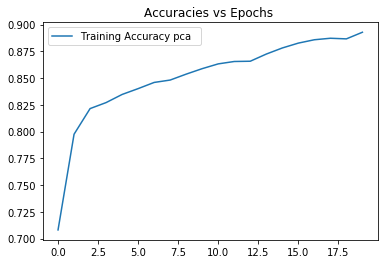

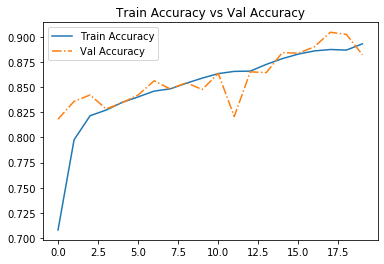

In [142]:
plt.title('Accuracies vs Epochs ')
plt.plot(history_MFCCs[0].history['accuracy'], label='Training Accuracy pca  ')
plt.legend()
plt.show()
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(history_MFCCs[0].history['accuracy'], label='Train Accuracy')
plt.plot(history_MFCCs[0].history['val_accuracy'], label='Val Accuracy', linestyle = "dashdot")

plt.legend()
plt.show()

# MFCC+DNN_LDA:

In [143]:
x_test,y_test,labels_test, x_train,y_train,labels_train,  x_valid,y_valid,labels_valid, val_test, val_train, val_valid= get_list_samples_name_benetos( 'b', path_save_audio_MFCCs,sample_ids_test, sample_ids_val, sample_ids_train )
print(len(x_train), len(x_valid), len(x_test) , len(y_train), len(y_valid), len(y_test))

x_train= np.array(x_train)
x_valid= np.array(x_valid)
x_test= np.array(x_test)
y_test=np.array(y_test)
y_train=np.array(y_train)
y_valid=np.array(y_valid)

X_train= np.concatenate((x_train, x_valid))
Y_train= np.concatenate((y_train, y_valid))

print(X_train.shape, x_test.shape, Y_train.shape, y_test.shape )


[2020-07-20 16:27:40 RAM73.6% 0.65GB] 6053 6054 5188 6053 6054 5188
[2020-07-20 16:27:41 RAM75.1% 0.79GB] (12107, 20, 44) (5188, 20, 44) (12107,) (5188,)


In [144]:
from keras.utils import np_utils
#from sklearn.preprocessing import StandardScaler

X_train_flat=X_train.reshape(-1, 880)
x_test_flat= x_test.reshape(-1, 880)
print(X_train_flat.shape, x_test_flat.shape, Y_train.shape, y_test.shape )


sc = StandardScaler()
X_train = sc.fit_transform(X_train_flat)
X_test = sc.transform(x_test_flat)



lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

print(X_train.shape, X_test.shape)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape, y_test.shape)

[2020-07-20 16:27:41 RAM73.8% 0.68GB] (12107, 880) (5188, 880) (12107,) (5188,)
[2020-07-20 16:27:46 RAM74.2% 0.68GB] (12107, 1) (5188, 1)
[2020-07-20 16:27:46 RAM74.2% 0.68GB] (12107, 2) (5188, 2)


In [145]:
batch_size=128
num_classes=2
epochs=20

model=Sequential()
model.add(Dense(1024, activation='relu', input_shape=(1, )))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 1024)              2048      
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_33 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_34 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 514       
Total params: 1,708,290
Trainable params: 1,708,290
Non-trainable params: 0
_________________________________________________________________


In [146]:
model.compile(loss='categorical_crossentropy', optimizer= RMSprop(), metrics=['accuracy'])
history_MFCCs.append( model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test) ))

Train on 12107 samples, validate on 5188 samples
Epoch 1/20
12107/12107 [==============================] - ETA: 13s - loss: 0.6906 - accuracy: 0.531 - ETA: 6s - loss: 0.4150 - accuracy: 0.794 - ETA: 5s - loss: 0.3683 - accuracy: 0.83 - ETA: 4s - loss: 0.3347 - accuracy: 0.85 - ETA: 4s - loss: 0.3028 - accuracy: 0.87 - ETA: 4s - loss: 0.2835 - accuracy: 0.88 - ETA: 3s - loss: 0.2676 - accuracy: 0.89 - ETA: 3s - loss: 0.2653 - accuracy: 0.89 - ETA: 3s - loss: 0.2601 - accuracy: 0.89 - ETA: 3s - loss: 0.2571 - accuracy: 0.89 - ETA: 3s - loss: 0.2532 - accuracy: 0.90 - ETA: 3s - loss: 0.2516 - accuracy: 0.90 - ETA: 3s - loss: 0.2502 - accuracy: 0.90 - ETA: 3s - loss: 0.2474 - accuracy: 0.90 - ETA: 2s - loss: 0.2436 - accuracy: 0.90 - ETA: 2s - loss: 0.2415 - accuracy: 0.90 - ETA: 2s - loss: 0.2421 - accuracy: 0.90 - ETA: 2s - loss: 0.2394 - accuracy: 0.90 - ETA: 2s - loss: 0.2405 - accuracy: 0.90 - ETA: 2s - loss: 0.2404 - accuracy: 0.90 - ETA: 2s - loss: 0.2407 - accuracy: 0.90 - ETA: 2s 

12107/12107 [==============================] - ETA: 3s - loss: 0.1979 - accuracy: 0.91 - ETA: 4s - loss: 0.2518 - accuracy: 0.89 - ETA: 3s - loss: 0.2484 - accuracy: 0.89 - ETA: 3s - loss: 0.2299 - accuracy: 0.90 - ETA: 3s - loss: 0.2285 - accuracy: 0.90 - ETA: 3s - loss: 0.2246 - accuracy: 0.91 - ETA: 4s - loss: 0.2245 - accuracy: 0.91 - ETA: 4s - loss: 0.2116 - accuracy: 0.92 - ETA: 4s - loss: 0.2099 - accuracy: 0.92 - ETA: 4s - loss: 0.2131 - accuracy: 0.91 - ETA: 3s - loss: 0.2148 - accuracy: 0.91 - ETA: 3s - loss: 0.2160 - accuracy: 0.91 - ETA: 3s - loss: 0.2154 - accuracy: 0.91 - ETA: 3s - loss: 0.2125 - accuracy: 0.91 - ETA: 3s - loss: 0.2102 - accuracy: 0.91 - ETA: 3s - loss: 0.2145 - accuracy: 0.91 - ETA: 3s - loss: 0.2152 - accuracy: 0.91 - ETA: 3s - loss: 0.2132 - accuracy: 0.91 - ETA: 3s - loss: 0.2117 - accuracy: 0.91 - ETA: 3s - loss: 0.2116 - accuracy: 0.91 - ETA: 3s - loss: 0.2140 - accuracy: 0.91 - ETA: 3s - loss: 0.2115 - accuracy: 0.91 - ETA: 3s - loss: 0.2114 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.2097 - accuracy: 0.93 - ETA: 3s - loss: 0.1868 - accuracy: 0.92 - ETA: 3s - loss: 0.1928 - accuracy: 0.92 - ETA: 3s - loss: 0.2078 - accuracy: 0.92 - ETA: 3s - loss: 0.2092 - accuracy: 0.92 - ETA: 2s - loss: 0.2291 - accuracy: 0.91 - ETA: 2s - loss: 0.2293 - accuracy: 0.90 - ETA: 2s - loss: 0.2276 - accuracy: 0.90 - ETA: 2s - loss: 0.2236 - accuracy: 0.91 - ETA: 2s - loss: 0.2195 - accuracy: 0.91 - ETA: 2s - loss: 0.2190 - accuracy: 0.91 - ETA: 2s - loss: 0.2157 - accuracy: 0.91 - ETA: 2s - loss: 0.2151 - accuracy: 0.91 - ETA: 2s - loss: 0.2198 - accuracy: 0.91 - ETA: 2s - loss: 0.2188 - accuracy: 0.91 - ETA: 2s - loss: 0.2159 - accuracy: 0.91 - ETA: 2s - loss: 0.2184 - accuracy: 0.91 - ETA: 2s - loss: 0.2185 - accuracy: 0.91 - ETA: 2s - loss: 0.2172 - accuracy: 0.91 - ETA: 2s - loss: 0.2155 - accuracy: 0.91 - ETA: 1s - loss: 0.2178 - accuracy: 0.91 - ETA: 1s - loss: 0.2171 - accuracy: 0.91 - ETA: 1s - loss: 0.2170 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.2003 - accuracy: 0.92 - ETA: 3s - loss: 0.1989 - accuracy: 0.92 - ETA: 3s - loss: 0.1856 - accuracy: 0.92 - ETA: 3s - loss: 0.2014 - accuracy: 0.91 - ETA: 3s - loss: 0.2140 - accuracy: 0.91 - ETA: 3s - loss: 0.2119 - accuracy: 0.91 - ETA: 3s - loss: 0.2092 - accuracy: 0.91 - ETA: 2s - loss: 0.2075 - accuracy: 0.91 - ETA: 2s - loss: 0.2140 - accuracy: 0.91 - ETA: 2s - loss: 0.2154 - accuracy: 0.91 - ETA: 2s - loss: 0.2191 - accuracy: 0.91 - ETA: 2s - loss: 0.2165 - accuracy: 0.91 - ETA: 2s - loss: 0.2170 - accuracy: 0.91 - ETA: 2s - loss: 0.2193 - accuracy: 0.91 - ETA: 2s - loss: 0.2190 - accuracy: 0.91 - ETA: 2s - loss: 0.2131 - accuracy: 0.91 - ETA: 2s - loss: 0.2113 - accuracy: 0.91 - ETA: 2s - loss: 0.2106 - accuracy: 0.91 - ETA: 2s - loss: 0.2102 - accuracy: 0.91 - ETA: 2s - loss: 0.2111 - accuracy: 0.91 - ETA: 2s - loss: 0.2130 - accuracy: 0.91 - ETA: 2s - loss: 0.2130 - accuracy: 0.91 - ETA: 1s - loss: 0.2121 - accu

12107/12107 [==============================] - ETA: 2s - loss: 0.1716 - accuracy: 0.94 - ETA: 2s - loss: 0.2224 - accuracy: 0.90 - ETA: 3s - loss: 0.2338 - accuracy: 0.89 - ETA: 2s - loss: 0.2321 - accuracy: 0.89 - ETA: 2s - loss: 0.2290 - accuracy: 0.89 - ETA: 2s - loss: 0.2196 - accuracy: 0.90 - ETA: 2s - loss: 0.2113 - accuracy: 0.90 - ETA: 2s - loss: 0.2105 - accuracy: 0.90 - ETA: 2s - loss: 0.2158 - accuracy: 0.90 - ETA: 2s - loss: 0.2113 - accuracy: 0.91 - ETA: 2s - loss: 0.2064 - accuracy: 0.91 - ETA: 2s - loss: 0.2085 - accuracy: 0.91 - ETA: 2s - loss: 0.2083 - accuracy: 0.91 - ETA: 2s - loss: 0.2106 - accuracy: 0.91 - ETA: 2s - loss: 0.2082 - accuracy: 0.91 - ETA: 2s - loss: 0.2062 - accuracy: 0.91 - ETA: 2s - loss: 0.2066 - accuracy: 0.91 - ETA: 2s - loss: 0.2064 - accuracy: 0.91 - ETA: 2s - loss: 0.2090 - accuracy: 0.91 - ETA: 2s - loss: 0.2082 - accuracy: 0.91 - ETA: 2s - loss: 0.2089 - accuracy: 0.91 - ETA: 1s - loss: 0.2082 - accuracy: 0.91 - ETA: 1s - loss: 0.2115 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.2495 - accuracy: 0.86 - ETA: 3s - loss: 0.2614 - accuracy: 0.88 - ETA: 3s - loss: 0.2356 - accuracy: 0.89 - ETA: 3s - loss: 0.2467 - accuracy: 0.89 - ETA: 3s - loss: 0.2344 - accuracy: 0.90 - ETA: 3s - loss: 0.2247 - accuracy: 0.90 - ETA: 2s - loss: 0.2306 - accuracy: 0.90 - ETA: 2s - loss: 0.2277 - accuracy: 0.90 - ETA: 2s - loss: 0.2281 - accuracy: 0.90 - ETA: 2s - loss: 0.2260 - accuracy: 0.90 - ETA: 2s - loss: 0.2241 - accuracy: 0.91 - ETA: 2s - loss: 0.2218 - accuracy: 0.91 - ETA: 2s - loss: 0.2248 - accuracy: 0.91 - ETA: 2s - loss: 0.2223 - accuracy: 0.91 - ETA: 2s - loss: 0.2231 - accuracy: 0.91 - ETA: 2s - loss: 0.2252 - accuracy: 0.91 - ETA: 2s - loss: 0.2242 - accuracy: 0.91 - ETA: 2s - loss: 0.2232 - accuracy: 0.91 - ETA: 2s - loss: 0.2213 - accuracy: 0.91 - ETA: 2s - loss: 0.2170 - accuracy: 0.91 - ETA: 2s - loss: 0.2153 - accuracy: 0.91 - ETA: 1s - loss: 0.2137 - accuracy: 0.91 - ETA: 1s - loss: 0.2136 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.2126 - accuracy: 0.91 - ETA: 3s - loss: 0.2004 - accuracy: 0.92 - ETA: 3s - loss: 0.1982 - accuracy: 0.91 - ETA: 3s - loss: 0.1948 - accuracy: 0.91 - ETA: 3s - loss: 0.2076 - accuracy: 0.91 - ETA: 2s - loss: 0.2157 - accuracy: 0.91 - ETA: 2s - loss: 0.2182 - accuracy: 0.91 - ETA: 2s - loss: 0.2161 - accuracy: 0.91 - ETA: 2s - loss: 0.2208 - accuracy: 0.91 - ETA: 2s - loss: 0.2210 - accuracy: 0.91 - ETA: 2s - loss: 0.2164 - accuracy: 0.91 - ETA: 2s - loss: 0.2137 - accuracy: 0.91 - ETA: 2s - loss: 0.2132 - accuracy: 0.91 - ETA: 2s - loss: 0.2141 - accuracy: 0.91 - ETA: 2s - loss: 0.2152 - accuracy: 0.91 - ETA: 2s - loss: 0.2158 - accuracy: 0.91 - ETA: 2s - loss: 0.2130 - accuracy: 0.91 - ETA: 2s - loss: 0.2121 - accuracy: 0.91 - ETA: 2s - loss: 0.2097 - accuracy: 0.91 - ETA: 2s - loss: 0.2134 - accuracy: 0.91 - ETA: 1s - loss: 0.2119 - accuracy: 0.91 - ETA: 1s - loss: 0.2123 - accuracy: 0.91 - ETA: 1s - loss: 0.2130 - accu

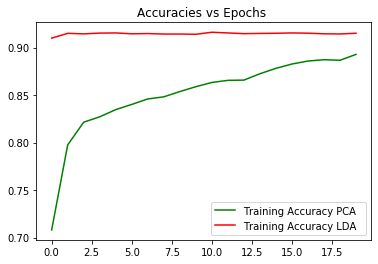

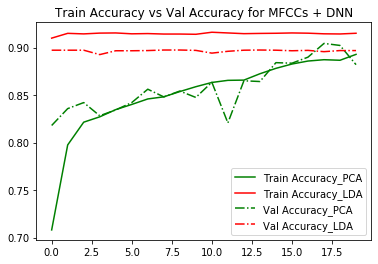

In [169]:
plt.title('Accuracies vs Epochs ')
plt.plot(history_MFCCs[0].history['accuracy'], label='Training Accuracy PCA  ', color='green')
plt.plot(history_MFCCs[1].history['accuracy'], label='Training Accuracy LDA  ', color='red')
plt.legend()
plt.show()
plt.title('Train Accuracy vs Val Accuracy for MFCCs + DNN')
plt.plot(history_MFCCs[0].history['accuracy'], label='Train Accuracy_PCA', color='green')
plt.plot(history_MFCCs[1].history['accuracy'], label='Train Accuracy_LDA', color='red')

plt.plot(history_MFCCs[0].history['val_accuracy'], label='Val Accuracy_PCA', linestyle = "dashdot", color='green')
plt.plot(history_MFCCs[1].history['val_accuracy'], label='Val Accuracy_LDA', linestyle = "dashdot", color='red')

plt.legend()
plt.show()

In [184]:
test_eval= model.evaluate(X_test, y_test, verbose=0)
print('test loss: ', test_eval[0])
print('test accuracy: ', test_eval[1])

# MFCC+ DNN_MI:

In [236]:
x_test,y_test,labels_test, x_train,y_train,labels_train,  x_valid,y_valid,labels_valid, val_test, val_train, val_valid= get_list_samples_name_benetos( 'b', path_save_audio_MFCCs,sample_ids_test, sample_ids_val, sample_ids_train )
print(len(x_train), len(x_valid), len(x_test) , len(y_train), len(y_valid), len(y_test))

x_train= np.array(x_train)
x_valid= np.array(x_valid)
x_test= np.array(x_test)
y_test=np.array(y_test)
y_train=np.array(y_train)
y_valid=np.array(y_valid)

X_train= np.concatenate((x_train, x_valid))
Y_train= np.concatenate((y_train, y_valid))

print(X_train.shape, x_test.shape, Y_train.shape, y_test.shape )


[2020-07-24 11:19:04 RAM65.2% 0.28GB] 6053 6054 5188 6053 6054 5188
[2020-07-24 11:19:05 RAM66.6% 0.39GB] (12107, 20, 44) (5188, 20, 44) (12107,) (5188,)


In [237]:
X_train=X_train.reshape(-1, 880)
x_test= x_test.reshape(-1, 880)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, x_test)
# One hot encoder 
Y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(y_test)
print(X_train_fs.shape, X_test_fs.shape, Y_train.shape, y_test.shape )

[2020-07-24 12:15:03 RAM81.4% 1.26GB] (12107, 100) (5188, 100) (12107, 2) (5188, 2)


In [240]:
batch_size=128
num_classes=2
epochs=20

model=Sequential()
model.add(Dense(1024 , activation='relu', input_shape= (100,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512   , activation='relu'))
model.add(Dense(256   , activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 1024)              103424    
_________________________________________________________________
dense_143 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_144 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_145 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_146 (Dense)            (None, 2)                 514       
Total params: 1,809,666
Trainable params: 1,809,666
Non-trainable params: 0
_________________________________________________________________


In [234]:
model.compile(loss='categorical_crossentropy', optimizer= RMSprop(), metrics=['accuracy'])
history_MFCCs.append( model.fit(X_train_fs, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_fs, y_test) ))

ValueError: Error when checking target: expected dense_140 to have shape (2,) but got array with shape (1,)

# --------------------------------------------------------------------------------------

# TTBOX+ SVM_PCA:

In [149]:
path_save_audio= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\ttb_mat'+os.sep 
#x_train, x_valid, x_test, y_train, y_valid, y_test = get_list_samples_name_TTBOX(path_save_audio, sample_ids_test, sample_ids_val, sample_ids_train)
x_test,y_test,labels_test, x_train,y_train,labels_train,  x_valid,y_valid,labels_valid, val_test, val_train, val_valid= get_list_samples_name_benetos( 'ttb_vec', path_save_audio ,sample_ids_test, sample_ids_val, sample_ids_train )
print("Reshape the data")
#x_train, x_valid, x_test, y_train, y_valid, y_test = get_list_sample_ids(path_save_audio_MFCCs, sample_ids_test, sample_ids_val, sample_ids_train)
print(len(x_train), len(x_valid), len(x_test) , len(y_train), len(y_valid), len(y_test))
print("Reshape the data")
x_train= np.array(x_train)
x_valid= np.array(x_valid)
x_test= np.array(x_test)
y_test=np.array(y_test)
y_train=np.array(y_train)
y_valid=np.array(y_valid)


X_train= np.concatenate((x_train, x_valid))
Y_train= np.concatenate((y_train, y_valid))
x, y, z= X_train.shape
X_train=X_train.reshape(x, y*z)
t, u, v= x_test.shape
x_test= x_test.reshape(t, u*v)

print(X_train.shape, x_test.shape, Y_train.shape, y_test.shape )


[2020-07-20 16:31:11 RAM73.8% 0.52GB] Reshape the data
[2020-07-20 16:31:11 RAM73.8% 0.52GB] 6053 6054 5188 6053 6054 5188
[2020-07-20 16:31:12 RAM73.8% 0.52GB] Reshape the data
[2020-07-20 16:31:12 RAM74.2% 0.55GB] (12107, 164) (5188, 164) (12107,) (5188,)


In [150]:
from sklearn.decomposition import PCA
pca=PCA(0.9)
pca.fit(X_train)
x_train_pca= pca.transform(X_train)
x_test_pca= pca.transform(x_test)
CLF, Test_GroundT, Train_GroundT, Test_Preds, Train_Preds, Test_Preds_Proba, Train_Preds_Proba = SVM_Classification_BeehiveSTATE(x_train_pca, Y_train , x_test_pca, y_test, kerneloption='rbf')
# Metrics
print("Accuracy: ", metrics.accuracy_score( Test_GroundT, Test_Preds))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Test_GroundT, Test_Preds))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Test_GroundT, Test_Preds))




[2020-07-20 16:31:12 RAM74.3% 0.55GB] Starting classification with SVM:


[2020-07-20 16:31:12 RAM74.3% 0.55GB] classification Beehive State into : Active or Missing Queen
[2020-07-20 16:31:33 RAM75.9% 0.62GB] Accuracy:  0.7781418658442559
[2020-07-20 16:31:33 RAM75.9% 0.62GB] Precision: 0.8178539224526601
[2020-07-20 16:31:33 RAM75.9% 0.62GB] Recall: 0.7083170636470129


# TTBOX+SVM_LDA:

In [151]:
path_save_audio= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\ttb_mat'+os.sep 
#x_train, x_valid, x_test, y_train, y_valid, y_test = get_list_samples_name_TTBOX(path_save_audio, sample_ids_test, sample_ids_val, sample_ids_train)
x_test,y_test,labels_test, x_train,y_train,labels_train,  x_valid,y_valid,labels_valid, val_test, val_train, val_valid= get_list_samples_name_benetos( 'ttb_vec', path_save_audio ,sample_ids_test, sample_ids_val, sample_ids_train )
print("Reshape the data")
x_train= np.array(x_train)
x_valid= np.array(x_valid)
x_test= np.array(x_test)
y_test=np.array(y_test)
y_train=np.array(y_train)
y_valid=np.array(y_valid)


X_train= np.concatenate((x_train, x_valid))
Y_train= np.concatenate((y_train, y_valid))
x, y, z= X_train.shape
X_train=X_train.reshape(x, y*z)
t, u, v= x_test.shape
x_test= x_test.reshape(t, u*v)

print(X_train.shape, x_test.shape, Y_train.shape, y_test.shape )


[2020-07-20 16:33:35 RAM75.0% 0.6GB] Reshape the data
[2020-07-20 16:33:35 RAM75.2% 0.62GB] (12107, 164) (5188, 164) (12107,) (5188,)


In [152]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(x_test)

In [153]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)

In [154]:
CLF, Test_GroundT, Train_GroundT, Test_Preds, Train_Preds, Test_Preds_Proba, Train_Preds_Proba = SVM_Classification_BeehiveSTATE(X_train, Y_train , X_test, y_test, kerneloption='rbf')
# Metrics
print("Accuracy: ", metrics.accuracy_score( Test_GroundT, Test_Preds))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Test_GroundT, Test_Preds))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Test_GroundT, Test_Preds))




[2020-07-20 16:33:36 RAM75.0% 0.61GB] Starting classification with SVM:


[2020-07-20 16:33:36 RAM75.0% 0.61GB] classification Beehive State into : Active or Missing Queen
[2020-07-20 16:33:51 RAM72.2% 0.49GB] Accuracy:  0.9286815728604472
[2020-07-20 16:33:51 RAM72.2% 0.49GB] Precision: 0.9458689458689459
[2020-07-20 16:33:51 RAM72.2% 0.49GB] Recall: 0.9074580242092932


Confusion matrix, without normalization
[[2494  133]
 [ 237 2324]]


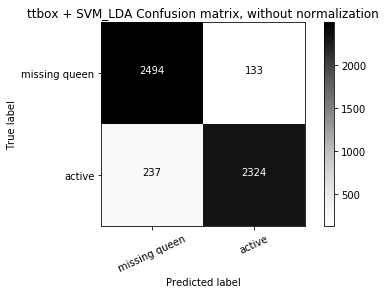

[2020-07-20 16:33:51 RAM72.2% 0.5GB] 
Clasification report TTBOX + SVM_LDA:
                precision    recall  f1-score   support

missing_queen       0.91      0.95      0.93      2627
       active       0.95      0.91      0.93      2561

     accuracy                           0.93      5188
    macro avg       0.93      0.93      0.93      5188
 weighted avg       0.93      0.93      0.93      5188



In [155]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Test_GroundT, Test_Preds )
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='ttbox + SVM_LDA Confusion matrix, without normalization')
plt.show()
# Plot normalized confusion matrix

plt.show()
target_names=['missing_queen', 'active']
print ('\nClasification report TTBOX + SVM_LDA:\n', classification_report(Test_GroundT, Test_Preds , target_names=target_names))

# TTBOX+SVM_MI:

In [217]:
path_save_audio= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\ttb_mat'+os.sep 
#x_train, x_valid, x_test, y_train, y_valid, y_test = get_list_samples_name_TTBOX(path_save_audio, sample_ids_test, sample_ids_val, sample_ids_train)
x_test,y_test,labels_test, x_train,y_train,labels_train,  x_valid,y_valid,labels_valid, val_test, val_train, val_valid= get_list_samples_name_benetos( 'ttb_vec', path_save_audio ,sample_ids_test, sample_ids_val, sample_ids_train )
print("Reshape the data")
x_train= np.array(x_train)
x_valid= np.array(x_valid)
x_test= np.array(x_test)
y_test=np.array(y_test)
y_train=np.array(y_train)
y_valid=np.array(y_valid)


X_train= np.concatenate((x_train, x_valid))
Y_train= np.concatenate((y_train, y_valid))
x, y, z= X_train.shape
X_train=X_train.reshape(x, y*z)
t, u, v= x_test.shape
x_test= x_test.reshape(t, u*v)

print(X_train.shape, x_test.shape, Y_train.shape, y_test.shape )

[2020-07-23 12:45:58 RAM68.1% 0.48GB] Reshape the data
[2020-07-23 12:45:58 RAM68.5% 0.52GB] (12107, 164) (5188, 164) (12107,) (5188,)


In [218]:
# evaluation of a model using 88 features chosen with mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
#Running the example fits the model on the 100 top selected features chosen using mutual information. 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_regression, k=100)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, x_test)
# fit the model
CLF, Test_GroundT, Train_GroundT, Test_Preds, Train_Preds, Test_Preds_Proba, Train_Preds_Proba = SVM_Classification_BeehiveSTATE(X_train_fs, Y_train , X_test_fs, y_test, kerneloption='rbf')
# Metrics
print("Accuracy: ", metrics.accuracy_score( Test_GroundT, Test_Preds))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(Test_GroundT, Test_Preds))
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Test_GroundT, Test_Preds))

mae = mean_absolute_error(Test_GroundT, Test_Preds)
print('MAE: %.3f' % mae)




[2020-07-23 12:52:19 RAM79.7% 1.64GB] Starting classification with SVM:


[2020-07-23 12:52:19 RAM79.7% 1.64GB] classification Beehive State into : Active or Missing Queen
[2020-07-23 12:55:16 RAM68.2% 1.66GB] Accuracy:  0.8614109483423285
[2020-07-23 12:55:16 RAM68.2% 1.66GB] Precision: 0.9213174748398902
[2020-07-23 12:55:16 RAM68.2% 1.66GB] Recall: 0.786411557985162
[2020-07-23 12:55:16 RAM68.2% 1.66GB] MAE: 0.139


Confusion matrix, without normalization
[[2455  172]
 [ 547 2014]]


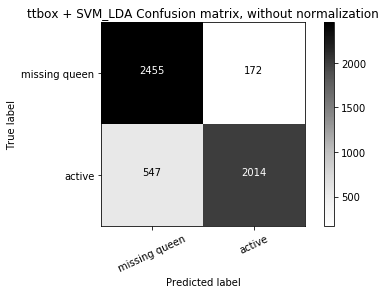

[2020-07-23 13:44:11 RAM61.6% 1.38GB] 
Clasification report TTBOX + SVM_LDA:
                precision    recall  f1-score   support

missing_queen       0.82      0.93      0.87      2627
       active       0.92      0.79      0.85      2561

     accuracy                           0.86      5188
    macro avg       0.87      0.86      0.86      5188
 weighted avg       0.87      0.86      0.86      5188



In [219]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Test_GroundT, Test_Preds )
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='ttbox + SVM_LDA Confusion matrix, without normalization')
plt.show()
# Plot normalized confusion matrix

plt.show()
target_names=['missing_queen', 'active']
print ('\nClasification report TTBOX + SVM_LDA:\n', classification_report(Test_GroundT, Test_Preds , target_names=target_names))

# TTBOX+ DNN_PCA:

In [156]:
path_save_audio= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\ttb_mat'+os.sep 
#x_train, x_valid, x_test, y_train, y_valid, y_test = get_list_samples_name_TTBOX(path_save_audio, sample_ids_test, sample_ids_val, sample_ids_train)
x_test,y_test,labels_test, x_train,y_train,labels_train,  x_valid,y_valid,labels_valid, val_test, val_train, val_valid= get_list_samples_name_benetos( 'ttb_vec', path_save_audio ,sample_ids_test, sample_ids_val, sample_ids_train )

print(len(x_train), len(x_valid), len(x_test) , len(y_train), len(y_valid), len(y_test))
x_train= np.array(x_train)
x_valid= np.array(x_valid)
x_test= np.array(x_test)
y_test=np.array(y_test)
y_train=np.array(y_train)
y_valid=np.array(y_valid)


X_train= np.concatenate((x_train, x_valid))
Y_train= np.concatenate((y_train, y_valid))

print(X_train.shape, x_test.shape, Y_train.shape, y_test.shape )


[2020-07-20 16:35:33 RAM71.9% 0.49GB] 6053 6054 5188 6053 6054 5188
[2020-07-20 16:35:33 RAM72.2% 0.53GB] (12107, 1, 164) (5188, 1, 164) (12107,) (5188,)


In [157]:
from sklearn.decomposition import PCA
from keras.utils import np_utils


X_train_flat=X_train.reshape(-1, 164)
x_test_flat= x_test.reshape(-1, 164)
print(X_train_flat.shape, x_test_flat.shape, Y_train.shape, y_test.shape )
print("calculate PCA ")
pca=PCA(0.9)
pca.fit(X_train_flat)
x_train_pca= pca.transform(X_train_flat)
x_test_pca= pca.transform(x_test_flat)
print(x_train_pca.shape, x_test_pca.shape)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape, y_test.shape)

[2020-07-20 16:35:33 RAM70.9% 0.42GB] (12107, 164) (5188, 164) (12107,) (5188,)
[2020-07-20 16:35:33 RAM70.9% 0.42GB] calculate PCA 
[2020-07-20 16:35:34 RAM70.8% 0.42GB] (12107, 2) (5188, 2)
[2020-07-20 16:35:34 RAM70.9% 0.42GB] (12107, 2) (5188, 2)


In [158]:
batch_size=128
num_classes=2
epochs=20

model=Sequential()
model.add(Dense(1024, activation='relu', input_shape=(2, )))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1024)              3072      
_________________________________________________________________
dense_37 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_38 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_39 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_40 (Dense)             (None, 2)                 514       
Total params: 1,709,314
Trainable params: 1,709,314
Non-trainable params: 0
_________________________________________________________________


In [159]:
model.compile(loss='categorical_crossentropy', optimizer= RMSprop(), metrics=['accuracy'])
history_TTBOX.append( model.fit(x_train_pca, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test_pca, y_test) ))

Train on 12107 samples, validate on 5188 samples
Epoch 1/20
12107/12107 [==============================] - ETA: 13s - loss: 33.6593 - accuracy: 0.45 - ETA: 6s - loss: 366.8139 - accuracy: 0.48 - ETA: 4s - loss: 243.6891 - accuracy: 0.53 - ETA: 4s - loss: 179.0405 - accuracy: 0.56 - ETA: 3s - loss: 142.3543 - accuracy: 0.59 - ETA: 3s - loss: 117.1848 - accuracy: 0.62 - ETA: 3s - loss: 100.7817 - accuracy: 0.61 - ETA: 3s - loss: 87.8590 - accuracy: 0.6323 - ETA: 3s - loss: 78.2703 - accuracy: 0.632 - ETA: 3s - loss: 70.4790 - accuracy: 0.641 - ETA: 3s - loss: 63.9997 - accuracy: 0.645 - ETA: 2s - loss: 58.6604 - accuracy: 0.655 - ETA: 2s - loss: 54.5299 - accuracy: 0.651 - ETA: 2s - loss: 52.6560 - accuracy: 0.655 - ETA: 2s - loss: 49.0005 - accuracy: 0.657 - ETA: 2s - loss: 45.8106 - accuracy: 0.664 - ETA: 2s - loss: 43.1062 - accuracy: 0.665 - ETA: 2s - loss: 40.7441 - accuracy: 0.665 - ETA: 2s - loss: 38.8180 - accuracy: 0.664 - ETA: 2s - loss: 36.9686 - accuracy: 0.661 - ETA: 2s - lo

12107/12107 [==============================] - ETA: 4s - loss: 0.5087 - accuracy: 0.73 - ETA: 4s - loss: 0.4510 - accuracy: 0.77 - ETA: 3s - loss: 0.4550 - accuracy: 0.76 - ETA: 3s - loss: 0.4703 - accuracy: 0.76 - ETA: 3s - loss: 0.4602 - accuracy: 0.77 - ETA: 3s - loss: 0.4680 - accuracy: 0.76 - ETA: 3s - loss: 0.4804 - accuracy: 0.76 - ETA: 3s - loss: 0.4764 - accuracy: 0.76 - ETA: 3s - loss: 0.4714 - accuracy: 0.77 - ETA: 2s - loss: 0.4609 - accuracy: 0.77 - ETA: 2s - loss: 0.4581 - accuracy: 0.77 - ETA: 2s - loss: 0.4598 - accuracy: 0.77 - ETA: 2s - loss: 0.4597 - accuracy: 0.76 - ETA: 2s - loss: 0.4709 - accuracy: 0.76 - ETA: 2s - loss: 0.4773 - accuracy: 0.76 - ETA: 2s - loss: 0.4753 - accuracy: 0.76 - ETA: 2s - loss: 0.4750 - accuracy: 0.76 - ETA: 2s - loss: 0.4725 - accuracy: 0.76 - ETA: 2s - loss: 0.4695 - accuracy: 0.76 - ETA: 2s - loss: 0.4662 - accuracy: 0.77 - ETA: 2s - loss: 0.4605 - accuracy: 0.77 - ETA: 2s - loss: 0.4646 - accuracy: 0.77 - ETA: 1s - loss: 0.4617 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.4619 - accuracy: 0.79 - ETA: 3s - loss: 0.4405 - accuracy: 0.79 - ETA: 3s - loss: 0.4360 - accuracy: 0.79 - ETA: 3s - loss: 0.4178 - accuracy: 0.80 - ETA: 3s - loss: 0.4101 - accuracy: 0.80 - ETA: 3s - loss: 0.4136 - accuracy: 0.80 - ETA: 3s - loss: 0.4233 - accuracy: 0.79 - ETA: 3s - loss: 0.4191 - accuracy: 0.80 - ETA: 3s - loss: 0.4182 - accuracy: 0.80 - ETA: 3s - loss: 0.4233 - accuracy: 0.79 - ETA: 3s - loss: 0.4243 - accuracy: 0.79 - ETA: 2s - loss: 0.4288 - accuracy: 0.79 - ETA: 2s - loss: 0.4320 - accuracy: 0.79 - ETA: 2s - loss: 0.4314 - accuracy: 0.79 - ETA: 2s - loss: 0.4299 - accuracy: 0.79 - ETA: 2s - loss: 0.4252 - accuracy: 0.79 - ETA: 2s - loss: 0.4232 - accuracy: 0.79 - ETA: 2s - loss: 0.4204 - accuracy: 0.79 - ETA: 2s - loss: 0.4259 - accuracy: 0.79 - ETA: 2s - loss: 0.4264 - accuracy: 0.79 - ETA: 2s - loss: 0.4277 - accuracy: 0.79 - ETA: 2s - loss: 0.4268 - accuracy: 0.79 - ETA: 2s - loss: 0.4270 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.4327 - accuracy: 0.78 - ETA: 3s - loss: 0.4337 - accuracy: 0.79 - ETA: 3s - loss: 0.4368 - accuracy: 0.79 - ETA: 3s - loss: 0.4311 - accuracy: 0.79 - ETA: 3s - loss: 0.4293 - accuracy: 0.78 - ETA: 3s - loss: 0.4330 - accuracy: 0.78 - ETA: 3s - loss: 0.4348 - accuracy: 0.78 - ETA: 3s - loss: 0.4338 - accuracy: 0.78 - ETA: 3s - loss: 0.4370 - accuracy: 0.77 - ETA: 3s - loss: 0.4399 - accuracy: 0.77 - ETA: 2s - loss: 0.4402 - accuracy: 0.77 - ETA: 2s - loss: 0.4446 - accuracy: 0.77 - ETA: 2s - loss: 0.4412 - accuracy: 0.78 - ETA: 2s - loss: 0.4416 - accuracy: 0.78 - ETA: 2s - loss: 0.4409 - accuracy: 0.77 - ETA: 2s - loss: 0.4393 - accuracy: 0.78 - ETA: 2s - loss: 0.4426 - accuracy: 0.77 - ETA: 2s - loss: 0.4389 - accuracy: 0.78 - ETA: 2s - loss: 0.4394 - accuracy: 0.78 - ETA: 2s - loss: 0.4368 - accuracy: 0.78 - ETA: 2s - loss: 0.4394 - accuracy: 0.78 - ETA: 2s - loss: 0.4381 - accuracy: 0.78 - ETA: 1s - loss: 0.4362 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.3699 - accuracy: 0.82 - ETA: 3s - loss: 0.4355 - accuracy: 0.80 - ETA: 3s - loss: 0.4326 - accuracy: 0.79 - ETA: 3s - loss: 0.4250 - accuracy: 0.80 - ETA: 3s - loss: 0.4321 - accuracy: 0.78 - ETA: 3s - loss: 0.4309 - accuracy: 0.78 - ETA: 2s - loss: 0.4312 - accuracy: 0.78 - ETA: 2s - loss: 0.4310 - accuracy: 0.78 - ETA: 2s - loss: 0.4332 - accuracy: 0.78 - ETA: 2s - loss: 0.4322 - accuracy: 0.78 - ETA: 2s - loss: 0.4351 - accuracy: 0.78 - ETA: 2s - loss: 0.4377 - accuracy: 0.78 - ETA: 2s - loss: 0.4398 - accuracy: 0.78 - ETA: 2s - loss: 0.4371 - accuracy: 0.78 - ETA: 2s - loss: 0.4376 - accuracy: 0.78 - ETA: 2s - loss: 0.4408 - accuracy: 0.78 - ETA: 2s - loss: 0.4383 - accuracy: 0.78 - ETA: 2s - loss: 0.4377 - accuracy: 0.78 - ETA: 2s - loss: 0.4368 - accuracy: 0.78 - ETA: 2s - loss: 0.4376 - accuracy: 0.78 - ETA: 2s - loss: 0.4364 - accuracy: 0.78 - ETA: 1s - loss: 0.4350 - accuracy: 0.79 - ETA: 1s - loss: 0.4325 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.3882 - accuracy: 0.80 - ETA: 3s - loss: 0.4144 - accuracy: 0.81 - ETA: 3s - loss: 0.4152 - accuracy: 0.81 - ETA: 3s - loss: 0.4080 - accuracy: 0.81 - ETA: 3s - loss: 0.4243 - accuracy: 0.80 - ETA: 3s - loss: 0.4188 - accuracy: 0.80 - ETA: 2s - loss: 0.4155 - accuracy: 0.80 - ETA: 2s - loss: 0.4210 - accuracy: 0.80 - ETA: 2s - loss: 0.4210 - accuracy: 0.80 - ETA: 2s - loss: 0.4286 - accuracy: 0.79 - ETA: 2s - loss: 0.4321 - accuracy: 0.79 - ETA: 2s - loss: 0.4325 - accuracy: 0.79 - ETA: 2s - loss: 0.4278 - accuracy: 0.79 - ETA: 2s - loss: 0.4250 - accuracy: 0.79 - ETA: 2s - loss: 0.4236 - accuracy: 0.79 - ETA: 2s - loss: 0.4235 - accuracy: 0.79 - ETA: 2s - loss: 0.4280 - accuracy: 0.79 - ETA: 2s - loss: 0.4248 - accuracy: 0.79 - ETA: 2s - loss: 0.4288 - accuracy: 0.79 - ETA: 2s - loss: 0.4294 - accuracy: 0.79 - ETA: 2s - loss: 0.4277 - accuracy: 0.79 - ETA: 1s - loss: 0.4305 - accuracy: 0.79 - ETA: 1s - loss: 0.4315 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.4050 - accuracy: 0.82 - ETA: 3s - loss: 0.3850 - accuracy: 0.83 - ETA: 3s - loss: 0.4158 - accuracy: 0.81 - ETA: 3s - loss: 0.4078 - accuracy: 0.82 - ETA: 3s - loss: 0.4124 - accuracy: 0.81 - ETA: 3s - loss: 0.4085 - accuracy: 0.81 - ETA: 3s - loss: 0.4022 - accuracy: 0.81 - ETA: 3s - loss: 0.4135 - accuracy: 0.80 - ETA: 2s - loss: 0.4148 - accuracy: 0.80 - ETA: 3s - loss: 0.4128 - accuracy: 0.81 - ETA: 2s - loss: 0.4161 - accuracy: 0.80 - ETA: 2s - loss: 0.4144 - accuracy: 0.80 - ETA: 2s - loss: 0.4167 - accuracy: 0.80 - ETA: 2s - loss: 0.4195 - accuracy: 0.80 - ETA: 2s - loss: 0.4192 - accuracy: 0.80 - ETA: 2s - loss: 0.4234 - accuracy: 0.80 - ETA: 2s - loss: 0.4240 - accuracy: 0.80 - ETA: 2s - loss: 0.4236 - accuracy: 0.80 - ETA: 2s - loss: 0.4278 - accuracy: 0.80 - ETA: 2s - loss: 0.4281 - accuracy: 0.79 - ETA: 2s - loss: 0.4302 - accuracy: 0.79 - ETA: 2s - loss: 0.4295 - accuracy: 0.79 - ETA: 1s - loss: 0.4301 - accu

# TTBOX+DNN_LDA:

In [160]:
path_save_audio= 'C:\\Users\\PC\\python\\Stage\\dataset_BeeNoBee_2_second'+str(block_size)+'sec'+'\\ttb_mat'+os.sep 
#x_train, x_valid, x_test, y_train, y_valid, y_test = get_list_samples_name_TTBOX(path_save_audio, sample_ids_test, sample_ids_val, sample_ids_train)
x_test,y_test,labels_test, x_train,y_train,labels_train,  x_valid,y_valid,labels_valid, val_test, val_train, val_valid= get_list_samples_name_benetos( 'ttb_vec', path_save_audio ,sample_ids_test, sample_ids_val, sample_ids_train )

print(len(x_train), len(x_valid), len(x_test) , len(y_train), len(y_valid), len(y_test))
x_train= np.array(x_train)
x_valid= np.array(x_valid)
x_test= np.array(x_test)
y_test=np.array(y_test)
y_train=np.array(y_train)
y_valid=np.array(y_valid)


X_train= np.concatenate((x_train, x_valid))
Y_train= np.concatenate((y_train, y_valid))

print(X_train.shape, x_test.shape, Y_train.shape, y_test.shape )


[2020-07-20 16:38:45 RAM71.5% 0.42GB] 6053 6054 5188 6053 6054 5188
[2020-07-20 16:38:45 RAM71.9% 0.46GB] (12107, 1, 164) (5188, 1, 164) (12107,) (5188,)


In [161]:
X_train_flat=X_train.reshape(-1, 164)
x_test_flat= x_test.reshape(-1, 164)
print(X_train_flat.shape, x_test_flat.shape, Y_train.shape, y_test.shape )
print("calculate LDA")

sc = StandardScaler()
X_train = sc.fit_transform(X_train_flat)
X_test = sc.transform(x_test_flat)

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, Y_train)
X_test = lda.transform(X_test)
print(X_train.shape, X_test.shape)

y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape, y_test.shape)

[2020-07-20 16:38:45 RAM71.6% 0.44GB] (12107, 164) (5188, 164) (12107,) (5188,)
[2020-07-20 16:38:45 RAM71.6% 0.44GB] calculate LDA
[2020-07-20 16:38:46 RAM71.1% 0.44GB] (12107, 1) (5188, 1)
[2020-07-20 16:38:46 RAM71.1% 0.44GB] (12107, 2) (5188, 2)


In [162]:
batch_size=128
num_classes=2
epochs=20

model=Sequential()
model.add(Dense(1024, activation='relu', input_shape=(1, )))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 1024)              2048      
_________________________________________________________________
dense_42 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_43 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_44 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_45 (Dense)             (None, 2)                 514       
Total params: 1,708,290
Trainable params: 1,708,290
Non-trainable params: 0
_________________________________________________________________


In [163]:
model.compile(loss='categorical_crossentropy', optimizer= RMSprop(), metrics=['accuracy'])
history_TTBOX.append( model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test)))

Train on 12107 samples, validate on 5188 samples
Epoch 1/20
12107/12107 [==============================] - ETA: 16s - loss: 0.7008 - accuracy: 0.539 - ETA: 7s - loss: 0.3777 - accuracy: 0.786 - ETA: 5s - loss: 0.2865 - accuracy: 0.84 - ETA: 5s - loss: 0.2544 - accuracy: 0.87 - ETA: 4s - loss: 0.2348 - accuracy: 0.88 - ETA: 4s - loss: 0.2143 - accuracy: 0.89 - ETA: 3s - loss: 0.2009 - accuracy: 0.90 - ETA: 3s - loss: 0.2002 - accuracy: 0.90 - ETA: 3s - loss: 0.2033 - accuracy: 0.90 - ETA: 3s - loss: 0.2004 - accuracy: 0.90 - ETA: 3s - loss: 0.1993 - accuracy: 0.90 - ETA: 3s - loss: 0.1983 - accuracy: 0.91 - ETA: 3s - loss: 0.1988 - accuracy: 0.91 - ETA: 2s - loss: 0.1988 - accuracy: 0.91 - ETA: 2s - loss: 0.1975 - accuracy: 0.91 - ETA: 2s - loss: 0.1955 - accuracy: 0.91 - ETA: 2s - loss: 0.1971 - accuracy: 0.91 - ETA: 2s - loss: 0.1953 - accuracy: 0.91 - ETA: 2s - loss: 0.1946 - accuracy: 0.91 - ETA: 2s - loss: 0.1894 - accuracy: 0.91 - ETA: 2s - loss: 0.1907 - accuracy: 0.92 - ETA: 2s 

12107/12107 [==============================] - ETA: 3s - loss: 0.1494 - accuracy: 0.92 - ETA: 3s - loss: 0.1773 - accuracy: 0.93 - ETA: 3s - loss: 0.1909 - accuracy: 0.93 - ETA: 3s - loss: 0.1863 - accuracy: 0.92 - ETA: 3s - loss: 0.1771 - accuracy: 0.92 - ETA: 3s - loss: 0.1814 - accuracy: 0.92 - ETA: 3s - loss: 0.1851 - accuracy: 0.92 - ETA: 2s - loss: 0.1813 - accuracy: 0.92 - ETA: 3s - loss: 0.1807 - accuracy: 0.92 - ETA: 2s - loss: 0.1769 - accuracy: 0.93 - ETA: 2s - loss: 0.1769 - accuracy: 0.92 - ETA: 2s - loss: 0.1799 - accuracy: 0.92 - ETA: 2s - loss: 0.1799 - accuracy: 0.92 - ETA: 2s - loss: 0.1851 - accuracy: 0.92 - ETA: 2s - loss: 0.1841 - accuracy: 0.92 - ETA: 2s - loss: 0.1821 - accuracy: 0.92 - ETA: 2s - loss: 0.1821 - accuracy: 0.92 - ETA: 2s - loss: 0.1797 - accuracy: 0.92 - ETA: 2s - loss: 0.1857 - accuracy: 0.92 - ETA: 2s - loss: 0.1851 - accuracy: 0.92 - ETA: 2s - loss: 0.1852 - accuracy: 0.92 - ETA: 2s - loss: 0.1830 - accuracy: 0.92 - ETA: 2s - loss: 0.1819 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.1731 - accuracy: 0.92 - ETA: 3s - loss: 0.1512 - accuracy: 0.93 - ETA: 3s - loss: 0.1594 - accuracy: 0.93 - ETA: 3s - loss: 0.1539 - accuracy: 0.93 - ETA: 3s - loss: 0.1401 - accuracy: 0.94 - ETA: 3s - loss: 0.1558 - accuracy: 0.93 - ETA: 2s - loss: 0.1638 - accuracy: 0.93 - ETA: 2s - loss: 0.1648 - accuracy: 0.93 - ETA: 2s - loss: 0.1617 - accuracy: 0.93 - ETA: 2s - loss: 0.1622 - accuracy: 0.93 - ETA: 2s - loss: 0.1648 - accuracy: 0.93 - ETA: 2s - loss: 0.1648 - accuracy: 0.93 - ETA: 2s - loss: 0.1666 - accuracy: 0.93 - ETA: 2s - loss: 0.1635 - accuracy: 0.93 - ETA: 2s - loss: 0.1624 - accuracy: 0.93 - ETA: 2s - loss: 0.1652 - accuracy: 0.93 - ETA: 2s - loss: 0.1650 - accuracy: 0.93 - ETA: 2s - loss: 0.1663 - accuracy: 0.93 - ETA: 2s - loss: 0.1659 - accuracy: 0.93 - ETA: 2s - loss: 0.1636 - accuracy: 0.93 - ETA: 2s - loss: 0.1661 - accuracy: 0.93 - ETA: 1s - loss: 0.1663 - accuracy: 0.93 - ETA: 1s - loss: 0.1671 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.1179 - accuracy: 0.96 - ETA: 3s - loss: 0.1791 - accuracy: 0.92 - ETA: 3s - loss: 0.1542 - accuracy: 0.93 - ETA: 3s - loss: 0.1659 - accuracy: 0.93 - ETA: 3s - loss: 0.1578 - accuracy: 0.93 - ETA: 3s - loss: 0.1633 - accuracy: 0.93 - ETA: 3s - loss: 0.1672 - accuracy: 0.93 - ETA: 3s - loss: 0.1645 - accuracy: 0.93 - ETA: 3s - loss: 0.1621 - accuracy: 0.93 - ETA: 3s - loss: 0.1650 - accuracy: 0.93 - ETA: 3s - loss: 0.1646 - accuracy: 0.93 - ETA: 3s - loss: 0.1656 - accuracy: 0.93 - ETA: 2s - loss: 0.1691 - accuracy: 0.93 - ETA: 2s - loss: 0.1722 - accuracy: 0.93 - ETA: 2s - loss: 0.1711 - accuracy: 0.92 - ETA: 2s - loss: 0.1721 - accuracy: 0.92 - ETA: 2s - loss: 0.1705 - accuracy: 0.93 - ETA: 2s - loss: 0.1693 - accuracy: 0.93 - ETA: 2s - loss: 0.1712 - accuracy: 0.93 - ETA: 2s - loss: 0.1706 - accuracy: 0.93 - ETA: 2s - loss: 0.1732 - accuracy: 0.92 - ETA: 2s - loss: 0.1724 - accuracy: 0.92 - ETA: 2s - loss: 0.1725 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.1951 - accuracy: 0.90 - ETA: 3s - loss: 0.2120 - accuracy: 0.90 - ETA: 3s - loss: 0.2039 - accuracy: 0.91 - ETA: 3s - loss: 0.1915 - accuracy: 0.91 - ETA: 3s - loss: 0.1733 - accuracy: 0.92 - ETA: 3s - loss: 0.1721 - accuracy: 0.92 - ETA: 3s - loss: 0.1695 - accuracy: 0.92 - ETA: 3s - loss: 0.1688 - accuracy: 0.92 - ETA: 3s - loss: 0.1747 - accuracy: 0.92 - ETA: 3s - loss: 0.1741 - accuracy: 0.92 - ETA: 3s - loss: 0.1708 - accuracy: 0.92 - ETA: 3s - loss: 0.1703 - accuracy: 0.92 - ETA: 3s - loss: 0.1701 - accuracy: 0.93 - ETA: 2s - loss: 0.1741 - accuracy: 0.92 - ETA: 2s - loss: 0.1747 - accuracy: 0.93 - ETA: 2s - loss: 0.1736 - accuracy: 0.93 - ETA: 2s - loss: 0.1719 - accuracy: 0.93 - ETA: 2s - loss: 0.1741 - accuracy: 0.93 - ETA: 2s - loss: 0.1755 - accuracy: 0.92 - ETA: 2s - loss: 0.1757 - accuracy: 0.92 - ETA: 2s - loss: 0.1747 - accuracy: 0.92 - ETA: 2s - loss: 0.1737 - accuracy: 0.92 - ETA: 2s - loss: 0.1713 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.1766 - accuracy: 0.92 - ETA: 3s - loss: 0.1687 - accuracy: 0.93 - ETA: 3s - loss: 0.1823 - accuracy: 0.92 - ETA: 3s - loss: 0.2009 - accuracy: 0.91 - ETA: 3s - loss: 0.2044 - accuracy: 0.91 - ETA: 3s - loss: 0.1961 - accuracy: 0.91 - ETA: 3s - loss: 0.1904 - accuracy: 0.91 - ETA: 3s - loss: 0.1885 - accuracy: 0.92 - ETA: 3s - loss: 0.1878 - accuracy: 0.92 - ETA: 3s - loss: 0.1884 - accuracy: 0.92 - ETA: 3s - loss: 0.1825 - accuracy: 0.92 - ETA: 3s - loss: 0.1853 - accuracy: 0.92 - ETA: 3s - loss: 0.1860 - accuracy: 0.92 - ETA: 2s - loss: 0.1875 - accuracy: 0.92 - ETA: 2s - loss: 0.1883 - accuracy: 0.92 - ETA: 2s - loss: 0.1911 - accuracy: 0.91 - ETA: 2s - loss: 0.1887 - accuracy: 0.91 - ETA: 2s - loss: 0.1864 - accuracy: 0.92 - ETA: 2s - loss: 0.1833 - accuracy: 0.92 - ETA: 2s - loss: 0.1826 - accuracy: 0.92 - ETA: 2s - loss: 0.1797 - accuracy: 0.92 - ETA: 2s - loss: 0.1798 - accuracy: 0.92 - ETA: 2s - loss: 0.1804 - accu

12107/12107 [==============================] - ETA: 3s - loss: 0.1488 - accuracy: 0.93 - ETA: 3s - loss: 0.1905 - accuracy: 0.92 - ETA: 3s - loss: 0.1659 - accuracy: 0.93 - ETA: 3s - loss: 0.1655 - accuracy: 0.92 - ETA: 3s - loss: 0.1631 - accuracy: 0.93 - ETA: 3s - loss: 0.1606 - accuracy: 0.93 - ETA: 3s - loss: 0.1642 - accuracy: 0.93 - ETA: 3s - loss: 0.1662 - accuracy: 0.92 - ETA: 3s - loss: 0.1687 - accuracy: 0.92 - ETA: 3s - loss: 0.1695 - accuracy: 0.92 - ETA: 2s - loss: 0.1726 - accuracy: 0.92 - ETA: 2s - loss: 0.1798 - accuracy: 0.92 - ETA: 2s - loss: 0.1781 - accuracy: 0.92 - ETA: 2s - loss: 0.1786 - accuracy: 0.92 - ETA: 2s - loss: 0.1766 - accuracy: 0.92 - ETA: 2s - loss: 0.1748 - accuracy: 0.92 - ETA: 2s - loss: 0.1770 - accuracy: 0.92 - ETA: 2s - loss: 0.1781 - accuracy: 0.92 - ETA: 2s - loss: 0.1777 - accuracy: 0.92 - ETA: 2s - loss: 0.1771 - accuracy: 0.92 - ETA: 2s - loss: 0.1752 - accuracy: 0.92 - ETA: 2s - loss: 0.1774 - accuracy: 0.92 - ETA: 2s - loss: 0.1782 - accu

In [164]:
test_eval= model.evaluate(X_test, y_test, verbose=0)
print('test loss: ', test_eval[0])
print('test accuracy: ', test_eval[1])

[2020-07-20 16:40:12 RAM72.1% 0.45GB] test loss:  0.18506029347186145
[2020-07-20 16:40:12 RAM72.2% 0.45GB] test accuracy:  0.929067075252533


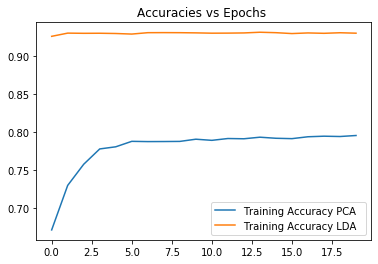

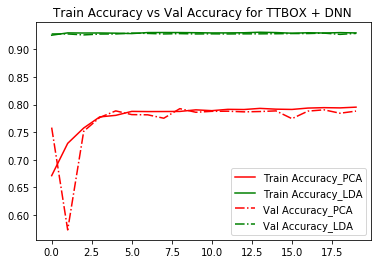

In [170]:
plt.title('Accuracies vs Epochs ')
plt.plot(history_TTBOX[0].history['accuracy'], label='Training Accuracy PCA  ')
plt.plot(history_TTBOX[1].history['accuracy'], label='Training Accuracy LDA ')
plt.legend()
plt.show()
plt.title('Train Accuracy vs Val Accuracy for TTBOX + DNN ')
plt.plot(history_TTBOX[0].history['accuracy'], label='Train Accuracy_PCA', color='red')
plt.plot(history_TTBOX[1].history['accuracy'], label='Train Accuracy_LDA' , color='green')
plt.plot(history_TTBOX[0].history['val_accuracy'], label='Val Accuracy_PCA',color='red', linestyle = "dashdot")
plt.plot(history_TTBOX[1].history['val_accuracy'], label='Val Accuracy_LDA', color='green', linestyle = "dashdot")

plt.legend()
plt.show()